In [1]:
import matplotlib.pyplot as plt
from chainercv.links.model.faster_rcnn import FasterRCNNVGG16
from chainer import serializers
from chainercv.visualizations import vis_bbox
from utils import BCCDBboxDataset, bccd_label_names

In [2]:
model = FasterRCNNVGG16(n_fg_class=len(bccd_label_names))
model.to_gpu(0)
serializers.load_npz("./result/snapshot_model.npz", model)

In [4]:
test_data = BCCDBboxDataset("./data/BCCD/", split='test')

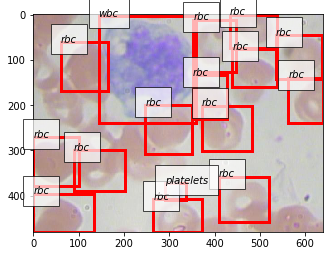

In [7]:
img, bbox, label = test_data.get_example(2)
vis_bbox(img, bbox, label, label_names=bccd_label_names)

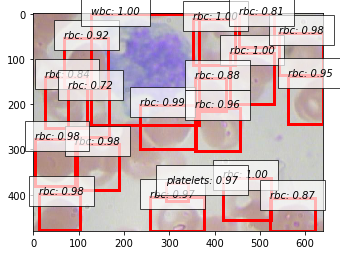

In [8]:
img, bbox, label = test_data.get_example(2)
bboxes, labels, scores = model.predict([img])
vis_bbox(img, bboxes[0], labels[0], scores[0],
         label_names=bccd_label_names)